In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import sys
sys.path.append('/home/ab/Modules/Python/') # Added for the modules
from datetime import datetime
plt.style.use('bmh')
from adt.data import Data

In [2]:
data = Data(pd.read_csv('../Data/train.csv'),pd.read_csv('../Data/test.csv')
            ,['desk_id','office_id','pf_category','country_code','currency','indicator_code','type','hedge_value','status'],['sold','bought'],modular = ['sell_date','start_date','creation_date'])

train : (9366, 18)
test: (4801, 17)


In [3]:
data.train['return'].describe()

count    9366.000000
mean        0.014100
std         0.020549
min        -0.009600
25%         0.003000
50%         0.005400
75%         0.014520
max         0.778441
Name: return, dtype: float64

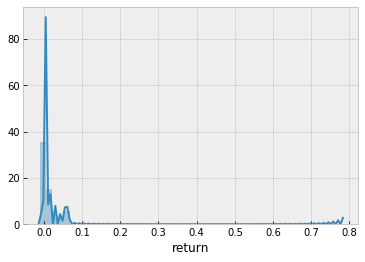

In [4]:
sns.distplot(data.train['return'])

### Measures of Skewness and Kurtosis
A fundamental task in many statistical analyses is to characterize the location and variability of a data set. A further characterization of the data includes skewness and kurtosis.

Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case. 

Weibull Distribution 	The fourth histogram is a sample from a Weibull distribution with shape parameter 1.5. The Weibull distribution is a skewed distribution with the amount of skewness depending on the value of the shape parameter. The degree of decay as we move away from the center also depends on the value of the shape parameter. For this data set, the skewness is 6.94 and the kurtosis is 206.153220, which indicates moderate skewness and kurtosis.
Many classical statistical tests and intervals depend on normality assumptions. Significant skewness and kurtosis clearly indicate that data are not normal. If a data set exhibits significant skewness or kurtosis (as indicated by a histogram or the numerical measures), what can we do about it?

One approach is to apply some type of transformation to try to make the data normal, or more nearly normal. The Box-Cox transformation is a useful technique for trying to normalize a data set. In particular, taking the log or square root of a data set is often useful for data that exhibit moderate right skewness. 

In [5]:
print("Skewness: %f" % data.train['return'].skew())
print("Kurtosis: %f" % data.train['return'].kurt())

Skewness: 6.940001
Kurtosis: 206.153220


## WTF thats too large Kirtosis and skewness
Let me drop the oulier and check the values

Skewness: 1.847882
Kurtosis: 3.406496


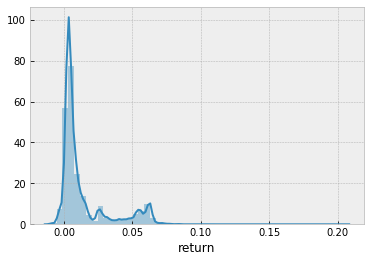

In [6]:
data.train = data.train.drop(1665)
print("Skewness: %f" % data.train['return'].skew())
print("Kurtosis: %f" % data.train['return'].kurt())
sns.distplot(data.train['return'])
data.train = data.train.drop(5236)
data.train = data.train.drop(2667)                          
data.train = data.train.drop(2668)       
data.train = data.train.drop(572)       
data.train = data.train.drop(573)       

In [7]:
data.train[data.train['sold'].isnull() == True]

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return


#### YEah Now let me analyze the value
Changed The entire distubution

In [8]:
data.train[data.train['return'] > 0.2]

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status,return
7096,PF00009234,DSK00006260,OFF00001001,A,20120424,13218700.0,T,0.00417,USD,0.948752,13200000.0,20120424,NaN,20120427,A,NaN,True,0.204


## Missing Value

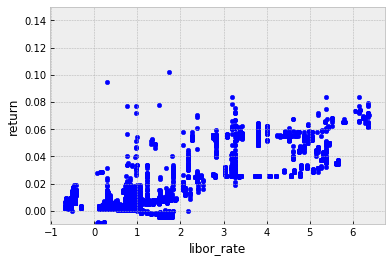

In [9]:
var = 'libor_rate'
temp_data = pd.concat([data.train['return'], data.train[var]], axis=1)
temp_data.plot.scatter(x=var, y='return', ylim=(-0.01,0.15));

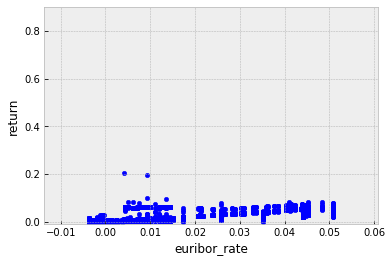

In [10]:
var = 'euribor_rate'
temp_data = pd.concat([data.train['return'], data.train[var]], axis=1)
temp_data.plot.scatter(x=var, y='return', ylim=(-0.01,0.9));

In [11]:
data.train.iloc[1665]

portfolio_id       PF00003550
desk_id           DSK00003268
office_id         OFF00001002
pf_category                 C
start_date           20090422
sold                 2.75e+07
country_code                M
euribor_rate          0.01105
currency                  CHF
libor_rate           0.767045
bought            2.74646e+07
creation_date        20090422
indicator_code            NaN
sell_date            20090511
type                        E
hedge_value               NaN
status                    NaN
return              0.0173774
Name: 1668, dtype: object

In [12]:
# # I have seen the datetime of 1665 Test have diffent format
# for i in data.getCustom('date'):
#     data.test.iloc[1665][i]= np.datetime64(datetime.strptime(str(data.test.iloc[1665][i]),'%Y-%m-%d'))

for i in data.getCustom('date'):
    data.train[i] = pd.to_datetime(list(map(lambda x: np.datetime64(datetime.strptime(str(x),'%Y%m%d')), data.train[i].values)))
    data.test[i] = pd.to_datetime(list(map(lambda x: np.datetime64(datetime.strptime(str(x),'%Y%m%d')), data.test[i].values)))


## Relationship with categorical features

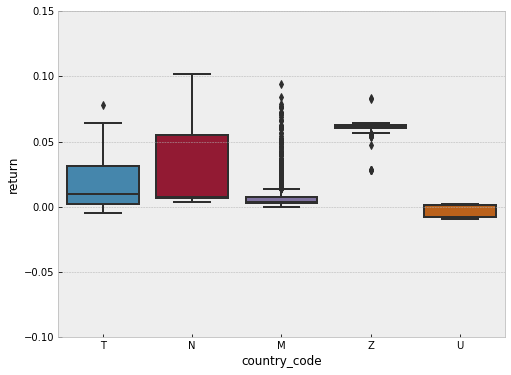

In [13]:
var = 'country_code'
temp_data = pd.concat([data.train['return'], data.train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="return", data=temp_data)
fig.axis(ymin=-0.1, ymax=0.15);

In [14]:
str(data.test.iloc[1621]['start_date'])

'2011-03-07 00:00:00'

In [15]:
def extractDateTime(df,m=False,y=False,d=False):
    if m:
        return df.apply(lambda x: x.month)
    if y:
        return df.apply(lambda x: x.year)
    if d:
        return df.apply(lambda x: x.day)
for i in data.getCustom('date'):
    print(i)
    a = i.split('_')[0]
    day = a + '_day'
    month = a + '_month'
    year = a + '_year'
    data.addColumns(day,extractDateTime(data.train[i],d=True),extractDateTime(data.test[i],d=True),'mod')
    data.addColumns(month,extractDateTime(data.train[i],m=True),extractDateTime(data.test[i],m=True),'mod')
    data.addColumns(year,extractDateTime(data.train[i],y=True),extractDateTime(data.test[i],y=True),'mod')   
data.test[data.test['sell_month'].isnull()]

start_date
creation_date
sell_date


,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,...,status,start_day,start_month,start_year,creation_day,creation_month,creation_year,sell_day,sell_month,sell_year


In [16]:
extractDateTime(data.test[data.test['sell_month'].isnull()]['sell_date'],y=True)

Series([], Name: sell_date, dtype: datetime64[ns])

In [17]:
def box_plot(var,ymax=0.3):
    var = var
    temp_data = pd.concat([data.train['return'], data.train[var]], axis=1)
    f, ax = plt.subplots(figsize=(16, 5))
    fig = sns.boxplot(x=var, y="return", data=temp_data)
    fig.axis(ymin=-0.05, ymax=ymax);
    plt.xticks(rotation=90);
data.modular

['sell_date',
 'start_date',
 'creation_date',
 'start_day',
 'start_month',
 'start_year',
 'creation_day',
 'creation_month',
 'creation_year',
 'sell_day',
 'sell_month',
 'sell_year']

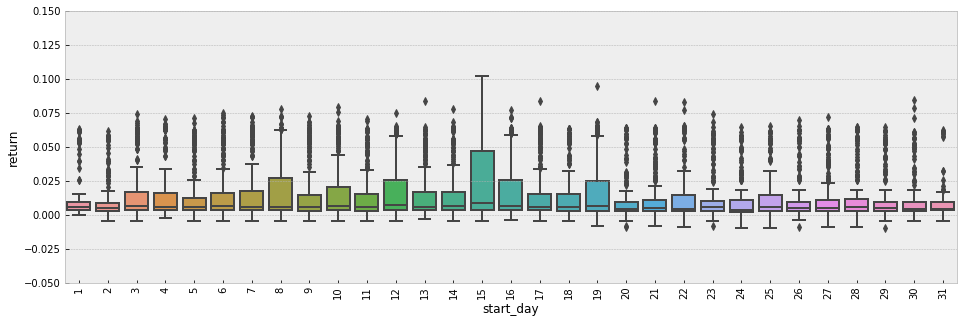

In [18]:
box_plot('start_day',0.15)

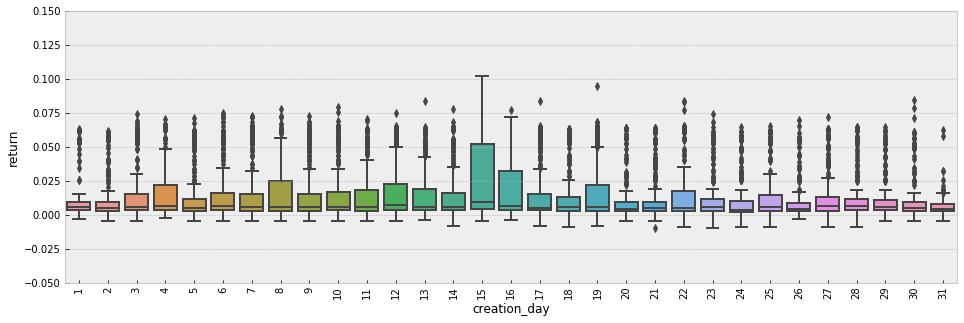

In [19]:
box_plot('creation_day',0.15)

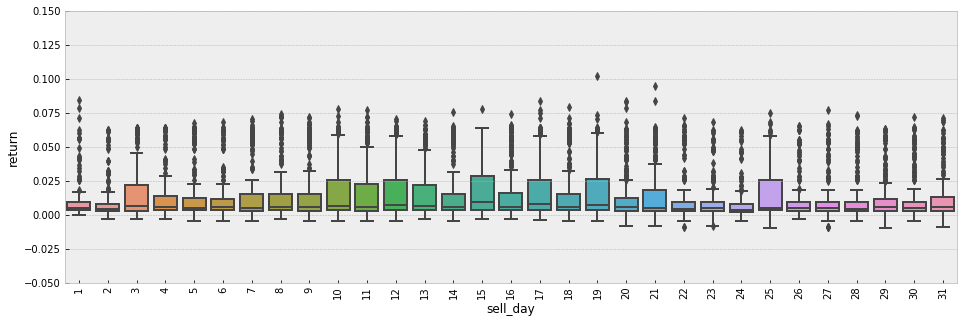

In [20]:
box_plot('sell_day',0.15)

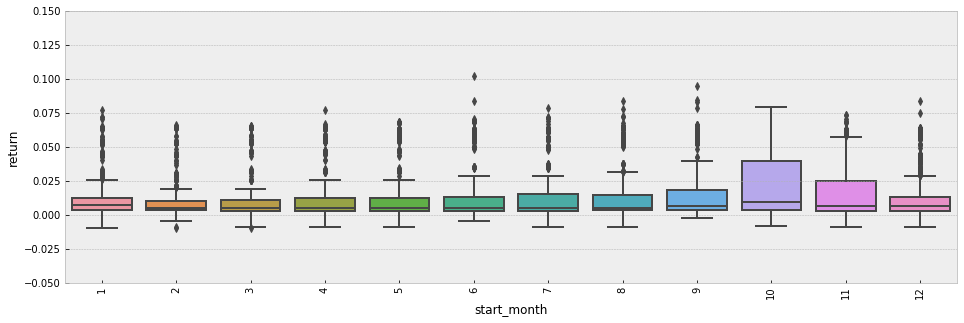

In [21]:
box_plot('start_month',0.15)

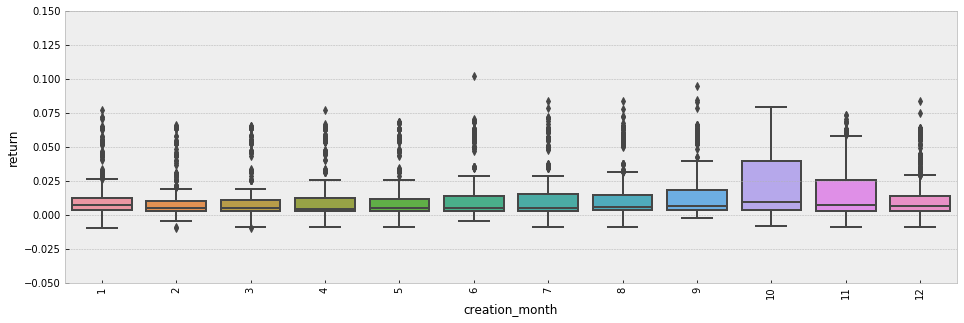

In [22]:
box_plot('creation_month',0.15)

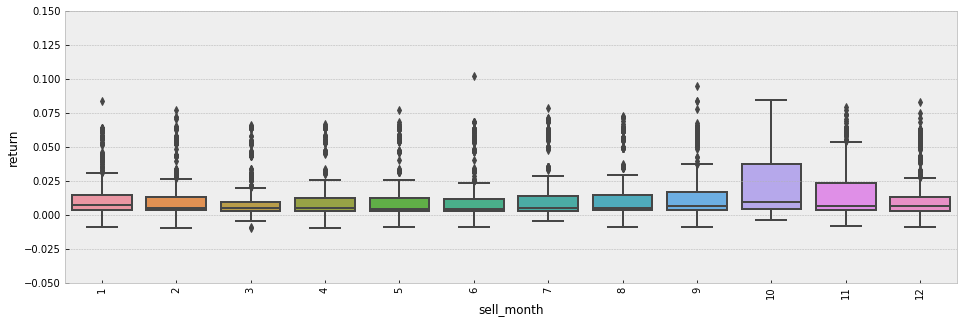

In [23]:
box_plot('sell_month',0.15)

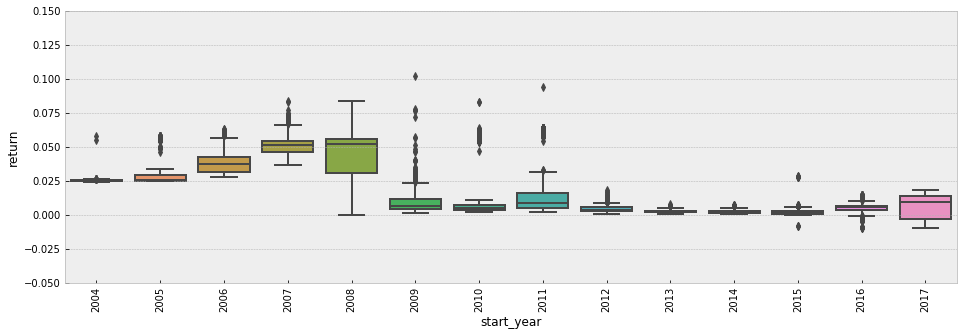

In [24]:
box_plot('start_year',0.15)

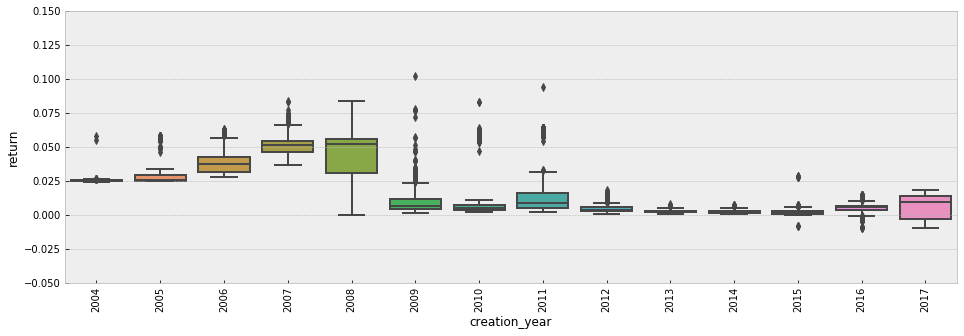

In [25]:
box_plot('creation_year',0.15)

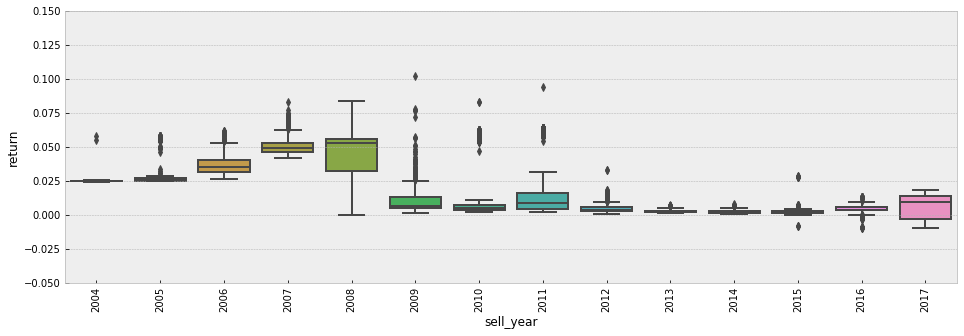

In [26]:
box_plot('sell_year',0.15)

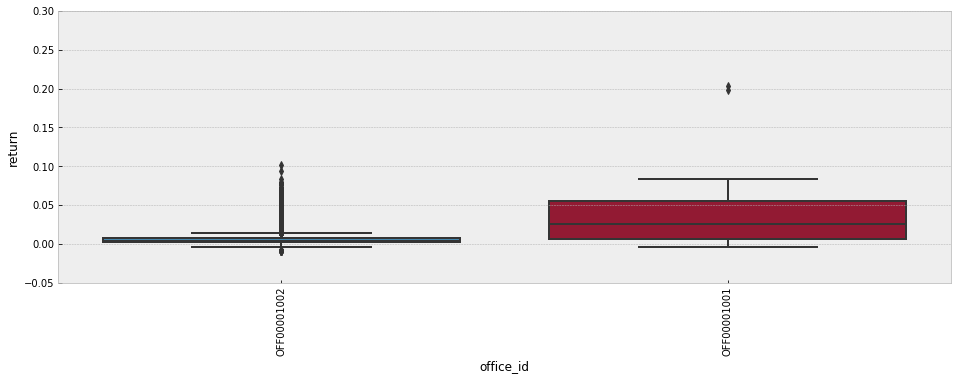

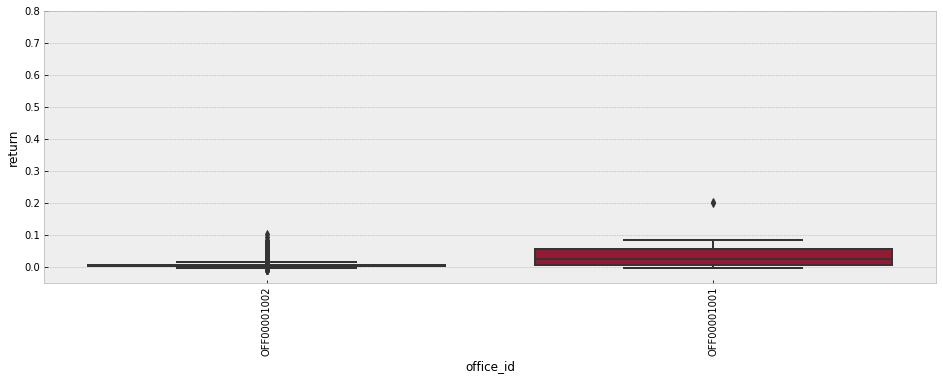

In [27]:
box_plot('office_id')
box_plot('office_id',0.8)

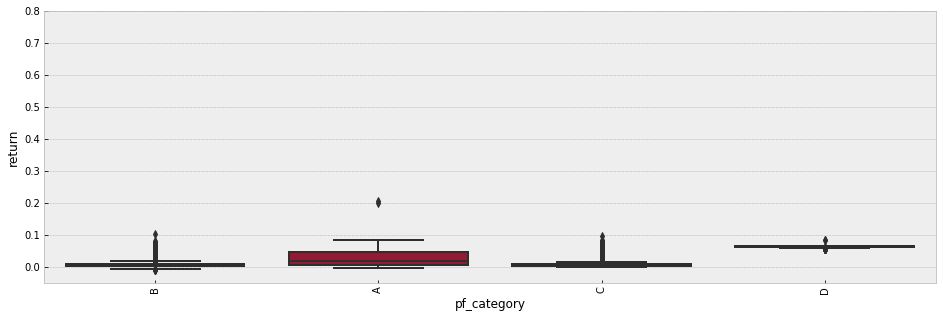

In [28]:
box_plot('pf_category',0.8)

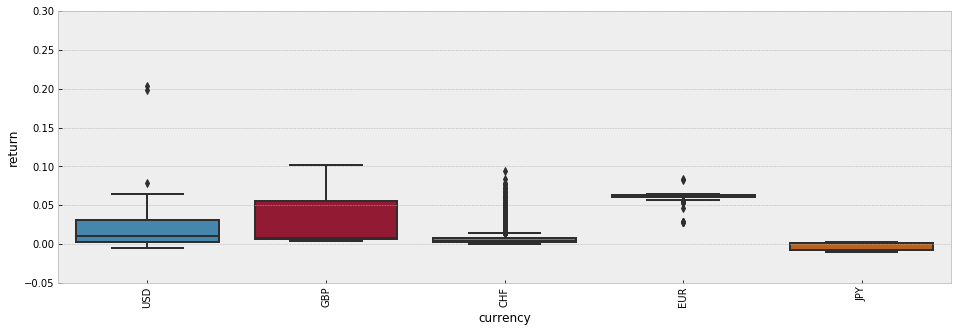

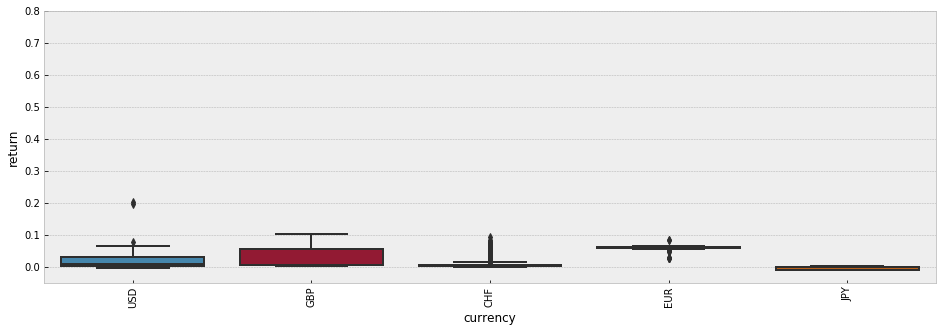

In [29]:
box_plot('currency')
box_plot('currency',0.8)

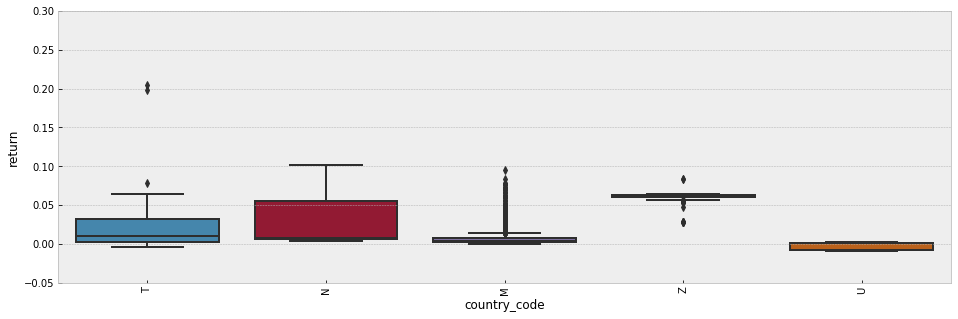

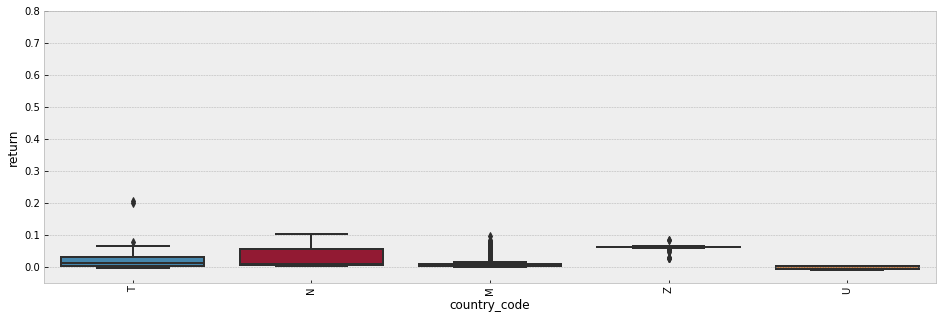

In [30]:
box_plot('country_code')
box_plot('country_code',0.8)

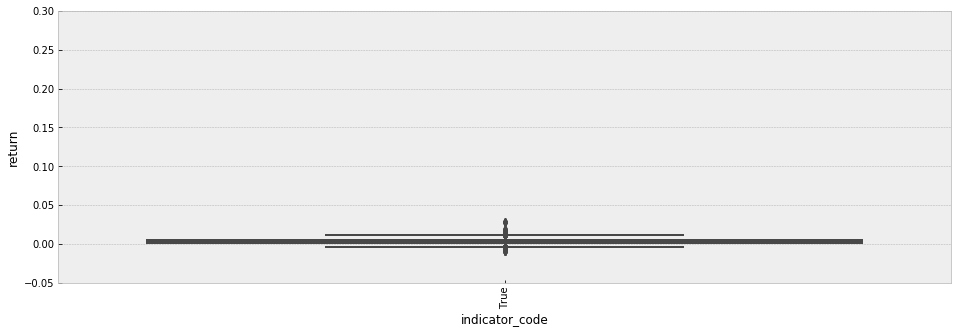

In [31]:
box_plot('indicator_code')


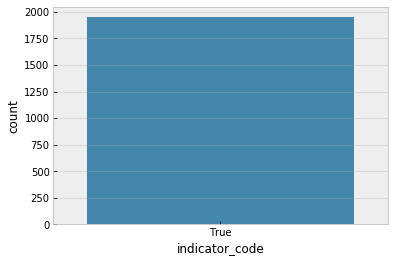

In [32]:
sns.countplot(data.test['indicator_code'])

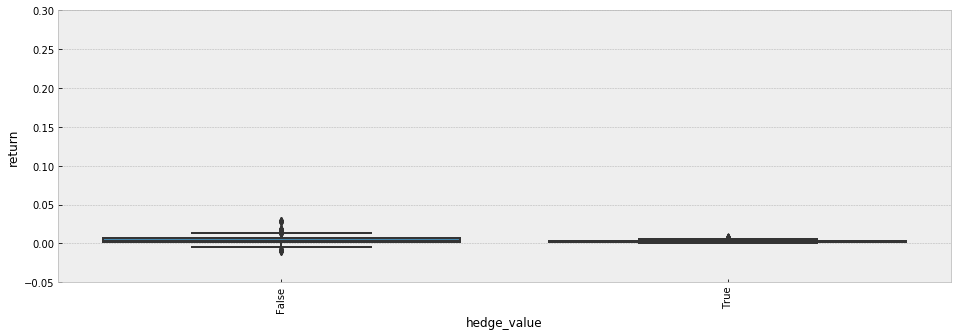

In [33]:
box_plot('hedge_value')

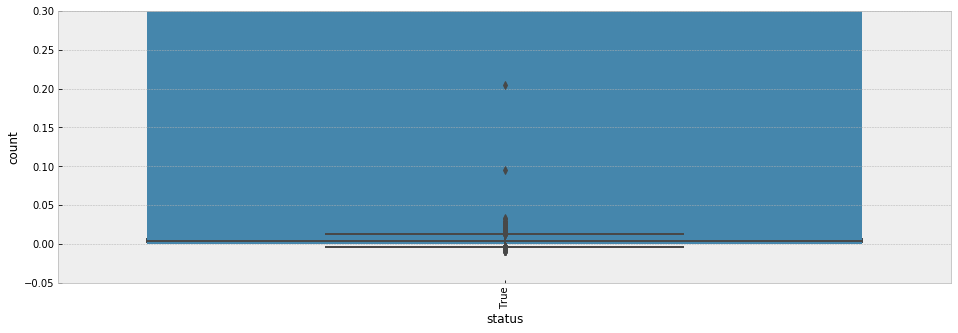

In [34]:
box_plot('status')
sns.countplot(data.test['status'])

In [35]:
total = data.train.isnull().sum().sort_values(ascending=False)
percent = (data.train.isnull().sum()/data.train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
hedge_value,5695,0.608440
indicator_code,5694,0.608333
desk_id,3664,0.391453
status,3078,0.328846
libor_rate,472,0.050427
sell_year,0,0.000000
creation_date,0,0.000000
office_id,0,0.000000
pf_category,0,0.000000
start_date,0,0.000000


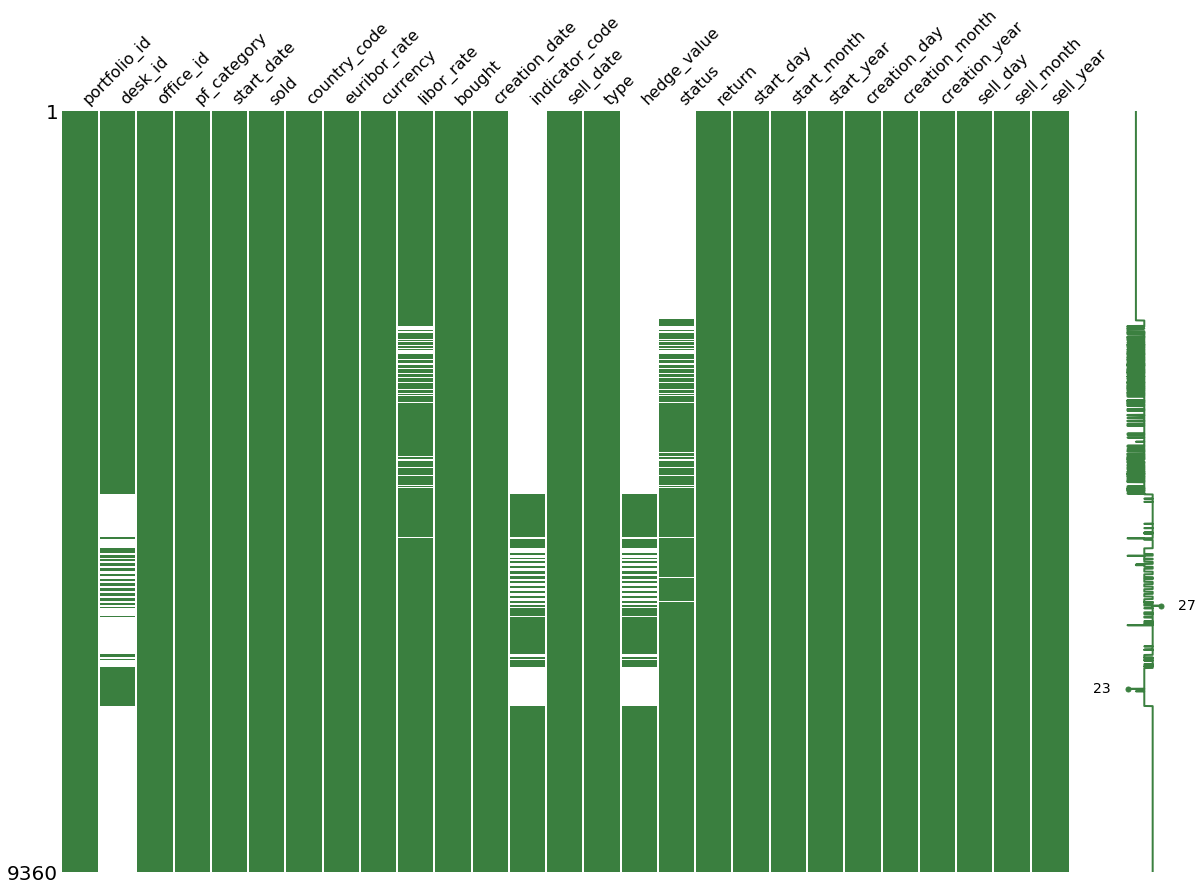

In [36]:
import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=data.train.iloc[:], figsize=(20, 14), color=(0.23, 0.5, 0.25))



In [37]:

for i in ['status','indicator_code','desk_id','hedge_value']:
    trainMissing = np.zeros(data.train.shape[0],dtype=int)
    testMissing = np.zeros(data.test.shape[0],dtype=int)
    name = 'isMissing'+i
    data.addColumns(name,trainMissing,testMissing,'cat')
    data.train.ix[data.train[i].isnull()==True,name] = 1
    data.drop(i)

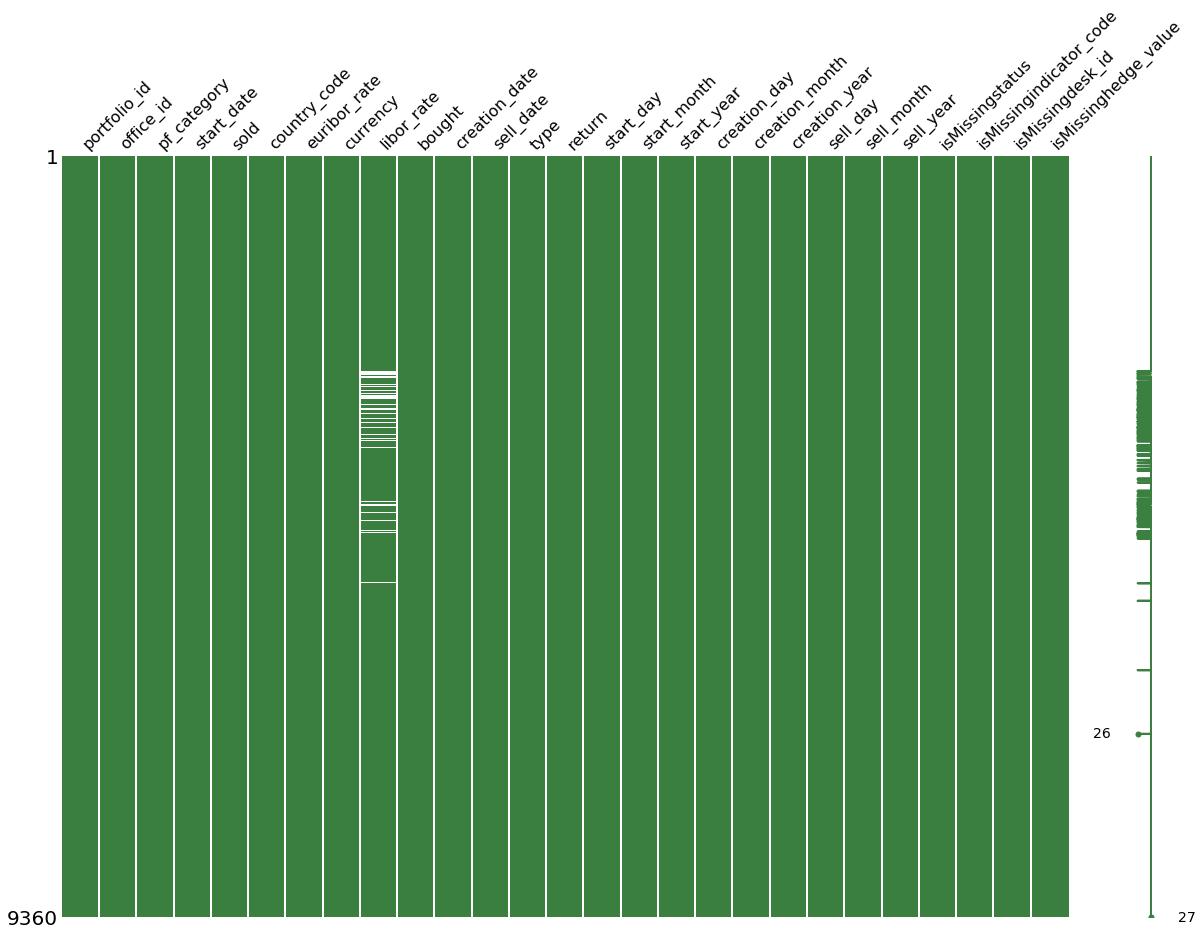

In [38]:
msno.matrix(df=data.train.iloc[:], figsize=(20, 14), color=(0.23, 0.5, 0.25))



In [39]:
for i in data.getCustom('date'):
    print(i)
    a = i.split('_')[0]
    name = a + '_week'
    data.addColumns(colName=name,trainData=data.train[i].apply(lambda x: x.weekday()),testData=data.test[i].apply(lambda x: x.weekday()),type='mod')

start_date
creation_date
sell_date


In [40]:
def get_season(month):
    if 1<=month<=3:
        return 0
    elif 4<=month<=6:
        return 1
    elif 7<=month<=9:
        return 2
    elif 10<=month<=12:
        return 4
    else:
        raise TypeError('Month must be (1,..,12) ' + str(month))
for i in data.getCustom('month'):
    print(i)
    a = i.split('_')[0]
    name = a + 'season'
    data.addColumns(colName=name,trainData=data.train[i].apply(get_season),testData=data.test[i].apply(get_season),type='mod')   

start_month
creation_month
sell_month


In [41]:
data.test.columns

Index(['portfolio_id', 'office_id', 'pf_category', 'start_date', 'sold',
       'country_code', 'euribor_rate', 'currency', 'libor_rate', 'bought',
       'creation_date', 'sell_date', 'type', 'start_day', 'start_month',
       'start_year', 'creation_day', 'creation_month', 'creation_year',
       'sell_day', 'sell_month', 'sell_year', 'isMissingstatus',
       'isMissingindicator_code', 'isMissingdesk_id', 'isMissinghedge_value',
       'start_week', 'creation_week', 'sell_week', 'startseason',
       'creationseason', 'sellseason'],
      dtype='object')

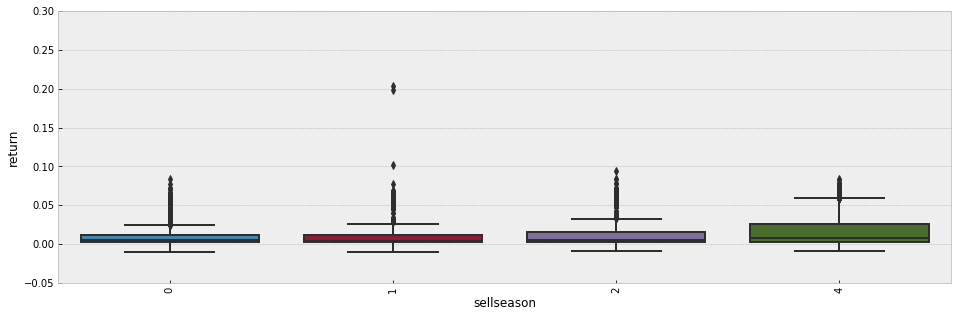

In [42]:
box_plot('sellseason')

#### Corelation

In [43]:
def plotHeatMap(df, size=(16,9),an=False):
    plt.figure(figsize=size)
    cmap = plt.cm.viridis
    sns.heatmap(df.corr(),cmap=cmap,linewidths=0.1,vmax=1, linecolor="white", square=True,annot=an)
    plt.show()

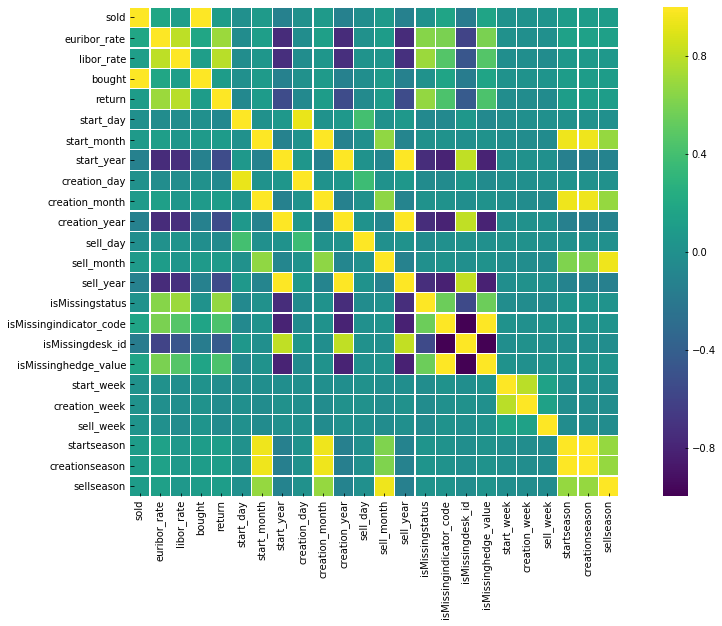

In [44]:
plotHeatMap(data.train)

start-sell, creation-sell

In [45]:
data.train['sell-start'] = data.train['sell_date'] - data.train['start_date']
data.test['sell-start'] = data.test['sell_date'] - data.test['start_date']

data.train['sell-creation'] = data.train['sell_date'] - data.train['creation_date']
data.test['sell-creation'] = data.test['sell_date'] - data.test['creation_date']

In [46]:
for i in data.getCustom('sell-'):
    data.train[i] = data.train[i].apply(lambda x: x.days)
    data.test[i] = data.test[i].apply(lambda x: x.days)

In [47]:
is_missing_train = np.zeros((data.train.shape[0],))
is_missing_test = np.zeros((data.test.shape[0],))
data.addColumns(colName='isMissinglibor',testData=is_missing_test,trainData=is_missing_train,type='cat')
data.test.ix[data.test['libor_rate'].isnull() == True,'isMissinglibor'] = 1
data.train.ix[data.train['libor_rate'].isnull() == True,'isMissinglibor'] = 1
data.test.ix[data.test['libor_rate'].isnull() == True,'libor_rate'] = np.nan
data.train.ix[data.train['libor_rate'].isnull() == True,'libor_rate'] = np.nan
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values=np.nan, strategy='mean', axis=0)
imr = imr.fit(data.train['libor_rate'].reshape(-1,1))
data.train['libor_rate'] = imr.transform(data.train['libor_rate'].reshape(-1,1))
data.test['libor_rate'] = imr.transform(data.test['libor_rate'].reshape(-1,1))

In [48]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.cross_validation import KFold

In [49]:
col = ['office_id', 'pf_category', 'sold',
       'country_code', 'euribor_rate', 'currency', 'libor_rate', 'bought', 'type','start_day',
       'start_month', 'start_year', 'creation_day', 'creation_month',
       'creation_year', 'sell_day', 'sell_month', 'sell_year',
       'isMissingstatus', 'isMissingindicator_code', 'isMissingdesk_id',
       'isMissinghedge_value', 'start_week', 'creation_week', 'sell_week',
       'startseason', 'creationseason', 'sellseason', 'sell-start',
       'sell-creation', 'isMissinglibor']
data.train.columns

Index(['portfolio_id', 'office_id', 'pf_category', 'start_date', 'sold',
       'country_code', 'euribor_rate', 'currency', 'libor_rate', 'bought',
       'creation_date', 'sell_date', 'type', 'return', 'start_day',
       'start_month', 'start_year', 'creation_day', 'creation_month',
       'creation_year', 'sell_day', 'sell_month', 'sell_year',
       'isMissingstatus', 'isMissingindicator_code', 'isMissingdesk_id',
       'isMissinghedge_value', 'start_week', 'creation_week', 'sell_week',
       'startseason', 'creationseason', 'sellseason', 'sell-start',
       'sell-creation', 'isMissinglibor'],
      dtype='object')

In [50]:
target = data.train['return'].ravel()
train = data.train[col]
test= data.test[col]
encodeCol = [i for i in data.category + data.modular if i in col]
def encode(train,test,encodeCol):
    zeroTrain = np.zeros(train.shape[0])
    zeroTest = np.zeros(test.shape[0])
    for i in encodeCol:
        encoded = pd.get_dummies(train[i])
        encodedTest = pd.get_dummies(test[i])
        col = encoded.columns
        for j in col:
            name = str(i) + '_' + str(j)
            print(name)
#             train[name] = zeroTrain
#             test[name] = zeroTest
            train[name]=encoded[j]
            if j in encodedTest.columns:
                test[name]=encodedTest[j]
            else:
                test[name]=zeroTest
        train = train.drop(i,axis=1)
        test = test.drop(i,axis=1)
    return train,test
train,test = encode(train,test,encodeCol)

office_id_OFF00001001
office_id_OFF00001002
pf_category_A
pf_category_B
pf_category_C
pf_category_D
country_code_M
country_code_N
country_code_T
country_code_U
country_code_Z
currency_CHF
currency_EUR
currency_GBP
currency_JPY
currency_USD
type_A
type_B
type_C
type_D
type_E
type_F
type_H
isMissingstatus_0
isMissingstatus_1
isMissingindicator_code_0
isMissingindicator_code_1
isMissingdesk_id_0
isMissingdesk_id_1
isMissinghedge_value_0
isMissinghedge_value_1
isMissinglibor_0.0
isMissinglibor_1.0
start_day_1
start_day_2
start_day_3
start_day_4
start_day_5
start_day_6
start_day_7
start_day_8
start_day_9
start_day_10
start_day_11
start_day_12
start_day_13
start_day_14
start_day_15
start_day_16
start_day_17
start_day_18
start_day_19
start_day_20
start_day_21
start_day_22
start_day_23
start_day_24
start_day_25
start_day_26
start_day_27
start_day_28
start_day_29
start_day_30
start_day_31
start_month_1
start_month_2
start_month_3
start_month_4
start_month_5
start_month_6
start_month_7
start_mon

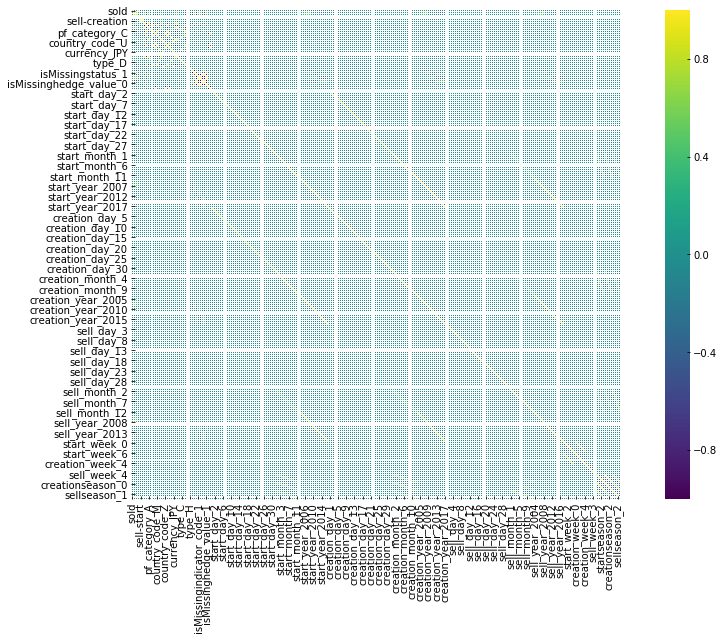

In [51]:
plotHeatMap(train)

In [52]:
  def scaler(train,test,columns):
        from sklearn.preprocessing import StandardScaler
        for colName in columns:
            print(colName)
            std_scale = StandardScaler().fit(test[colName].reshape(-1,1))
            test[colName] = std_scale.transform(test[colName].reshape(-1,1))
            train[colName] = std_scale.transform(train[colName].reshape(-1,1))
        return train,test

In [53]:
cont = ['euribor_rate','libor_rate','bought','sold']
train,test = scaler(train,test,cont)

euribor_rate
libor_rate
bought
sold


In [61]:
data.drop('creation_date')
data.drop('sell_date')
data.train['start_date'] = data.train['start_date'].astype(int)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labelEncodeDict = {}
for i in data.category:
    data.train[i] = data.train[i].fillna('Missing')
    data.test[i] = data.test[i].fillna('Missing')
    
    labelEncodeDict[i] = le.fit(data.train[i])
    data.train[i] = le.transform(data.train[i])
    data.test[i] = le.transform(data.test[i])

In [81]:

X_train = data.train[[i for i in data.train.columns if 'portfolio_id' != i]]
X_test = data.test[[i for i in data.test.columns if 'portfolio_id' != i]] 

In [82]:
Y_train = X_train['return']
X_train = X_train.drop('return',axis=1)

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import sys
sys.path.append('/home/ab/Modules/Python/') # Added for the modules
from datetime import datetime
plt.style.use('bmh')
from adt.data import Data
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
import xgboost as xgb
import lightgbm as lgb

In [84]:
lassocv = LassoCV(eps=1e-7)
ridge = Ridge(alpha=1e-6)
lassolarscv = LassoLarsCV()
elasticnetcv = ElasticNetCV(eps=1e-15)

In [89]:
val_score = cross_val_score(lassocv,X_train,Y_train,cv=2,scoring="r2",n_jobs=4)

In [90]:
val_score

array([-0.73803667, -2.06843828])

In [79]:
data.train['start_date']

0      2004-07-20
1      2004-07-09
2      2004-07-23
3      2004-06-09
4      2004-06-09
5      2004-07-07
6      2004-07-06
7      2004-07-06
8      2004-04-19
9      2004-04-14
10     2004-06-11
11     2004-08-05
12     2004-08-05
13     2004-08-09
14     2004-05-11
15     2004-08-10
16     2004-08-10
17     2004-08-11
18     2004-07-20
19     2004-08-12
20     2004-08-12
21     2004-08-25
22     2004-09-06
23     2004-09-07
24     2004-09-09
25     2004-09-09
26     2004-09-09
27     2004-09-10
28     2004-09-10
29     2004-09-13
          ...    
9336   2015-10-26
9337   2015-12-11
9338   2015-12-11
9339   2016-05-26
9340   2016-06-01
9341   2016-05-27
9342   2016-05-27
9343   2016-06-14
9344   2016-06-16
9345   2016-06-22
9346   2016-06-22
9347   2016-06-20
9348   2016-06-20
9349   2016-06-20
9350   2016-06-21
9351   2016-06-21
9352   2016-06-21
9353   2016-06-21
9354   2016-06-23
9355   2016-06-23
9356   2016-06-23
9357   2016-06-23
9358   2016-06-23
9359   2016-06-23
9360   201